<a href="https://colab.research.google.com/github/Praz98/HomeLLC/blob/main/Model_fitting_HomeLLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install matplotlib

In [3]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import matplotlib.pyplot as plt
#importing libraries

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [4]:
mod_df = pd.read_csv("/content/drive/MyDrive/cleaned data/merged_added_features.csv")
mod_df.rename(columns = {"Unnamed: 0":"DATE"},inplace=True)
mod_df.set_index(mod_df["DATE"],inplace=True)
mod_df.drop(columns = ["DATE"],inplace=True)

In [126]:

# # Assuming you have already loaded your DataFrame and renamed the column as you mentioned
# mod_df = pd.read_csv("/content/drive/MyDrive/cleaned data/merged_added_features.csv")
# mod_df.rename(columns={"Unnamed: 0": "DATE"}, inplace=True)

# # Set the "DATE" column as a datetime index
# mod_df['DATE'] = pd.to_datetime(mod_df['DATE'])
# mod_df.set_index('DATE', inplace=True)

# # Filter the DataFrame for data starting from January 2001
# start_date = '2001-01-01'
# filtered_df = mod_df[start_date:]

# # Now, you can use filtered_df for your modeling


In [127]:
# mod_df = filtered_df.copy()

In [128]:
# mod_df

In [5]:

# Apply one-hot encoding and drop rows with missing values
mod_df = pd.get_dummies(mod_df, drop_first=True).dropna()

# Split the data into training and testing sets
train = mod_df[:"2015"]
test = mod_df["2016":]

# Separate the features and the target variable for training
trainx = train.loc[:, train.columns != "target"]
trainy = train["target"]

# Separate the features and the target variable for testing
testx = test.loc[:, test.columns != "target"]
testy = test["target"]

# Create copies of the training features and target variable
X = trainx.copy()
y = trainy.copy()

# Now you can use X and y for your modeling tasks


<Axes: >

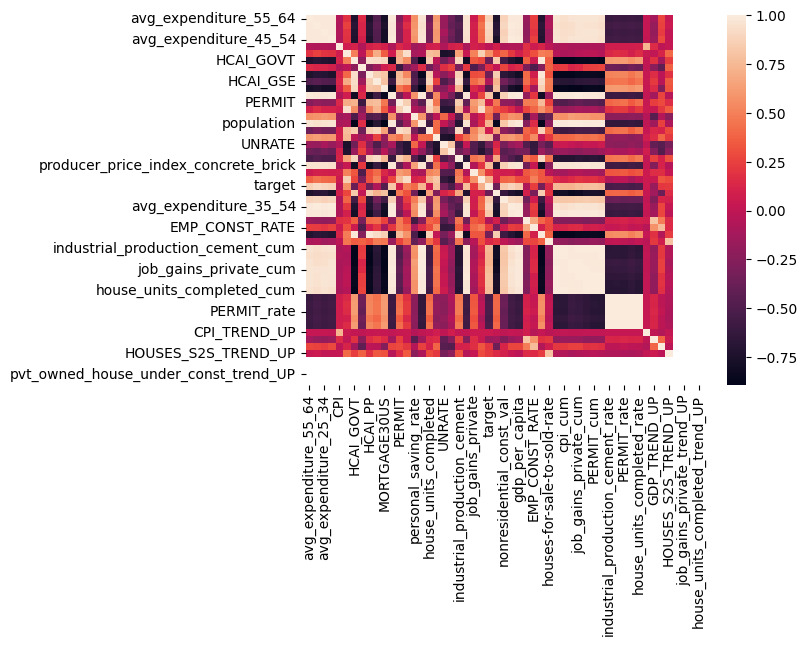

In [6]:
sns.heatmap(mod_df.corr())

In [7]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [8]:
testx = scaler.transform(testx)

In [9]:
#Initializing lassoCV instance
reg = LassoCV()
# Fitting the instance
reg.fit(X, y)
print(f"Best alpha using built-in LassoCV: {round(reg.alpha_,5)}")

print(f"Best score using built-in LassoCV:{round(reg.score(testx,testy),4)}")

coef = pd.Series(reg.coef_, index = trainx.columns)

Best alpha using built-in LassoCV: 0.01471
Best score using built-in LassoCV:0.7418


In [10]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 27 variables and eliminated the other 25 variables


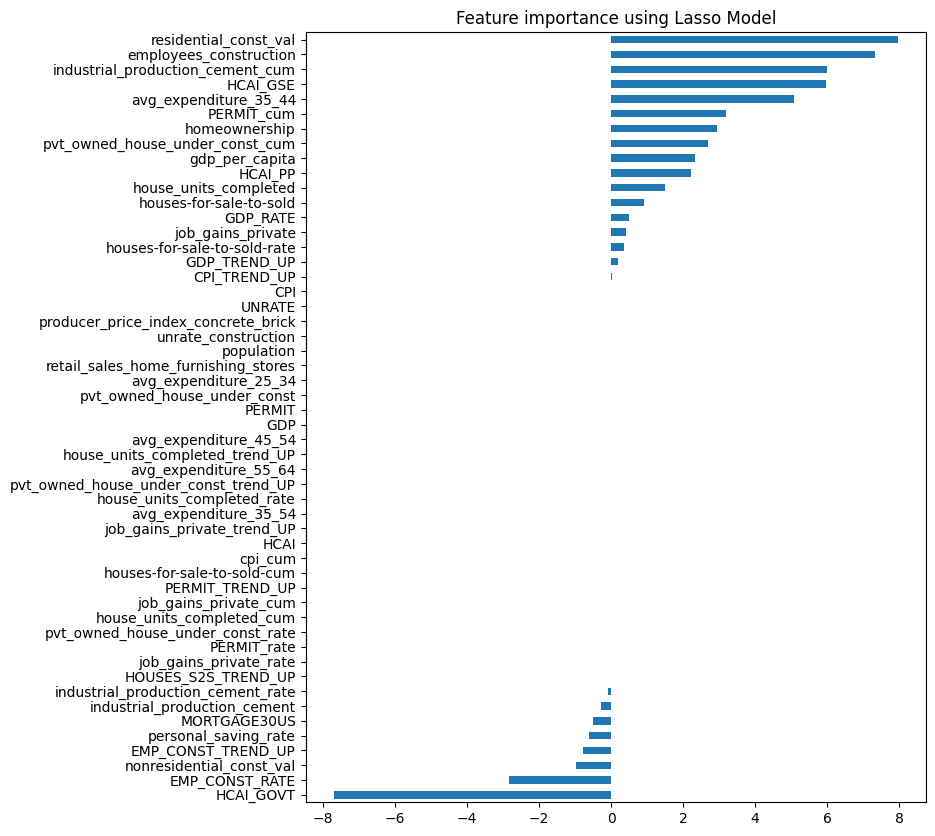

In [11]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

plt.savefig("/content/drive/MyDrive/HOME LLC IMAGES")

In [12]:
coef[coef==0]

avg_expenditure_55_64                  -0.0
avg_expenditure_25_34                   0.0
avg_expenditure_45_54                  -0.0
GDP                                     0.0
PERMIT                                 -0.0
pvt_owned_house_under_const             0.0
population                              0.0
retail_sales_home_furnishing_stores     0.0
UNRATE                                 -0.0
unrate_construction                     0.0
producer_price_index_concrete_brick    -0.0
avg_expenditure_35_54                   0.0
HCAI                                    0.0
cpi_cum                                 0.0
houses-for-sale-to-sold-cum             0.0
job_gains_private_cum                   0.0
house_units_completed_cum               0.0
pvt_owned_house_under_const_rate       -0.0
PERMIT_rate                            -0.0
job_gains_private_rate                 -0.0
house_units_completed_rate             -0.0
PERMIT_TREND_UP                         0.0
job_gains_private_trend_UP      

In [13]:
((coef[coef!=0]).sort_values(ascending=False))

residential_const_val                7.958299
employees_construction               7.340256
industrial_production_cement_cum     5.998419
HCAI_GSE                             5.970593
avg_expenditure_35_44                5.073211
PERMIT_cum                           3.199001
homeownership                        2.951013
pvt_owned_house_under_const_cum      2.703983
gdp_per_capita                       2.338578
HCAI_PP                              2.230450
house_units_completed                1.500873
houses-for-sale-to-sold              0.916519
GDP_RATE                             0.499380
job_gains_private                    0.420580
houses-for-sale-to-sold-rate         0.371438
GDP_TREND_UP                         0.186119
CPI_TREND_UP                         0.017271
CPI                                  0.010114
HOUSES_S2S_TREND_UP                 -0.007285
industrial_production_cement_rate   -0.089209
industrial_production_cement        -0.292896
MORTGAGE30US                      

In [14]:
mse = mean_squared_error(reg.predict(testx),testy)
print(f" MSE = {mse}")
print(f"RMSE = {mse**0.5}")
print(f" R2  = {round(reg.score(testx,testy),4)}")

 MSE = 56.691090505213886
RMSE = 7.529348610949946
 R2  = 0.7418


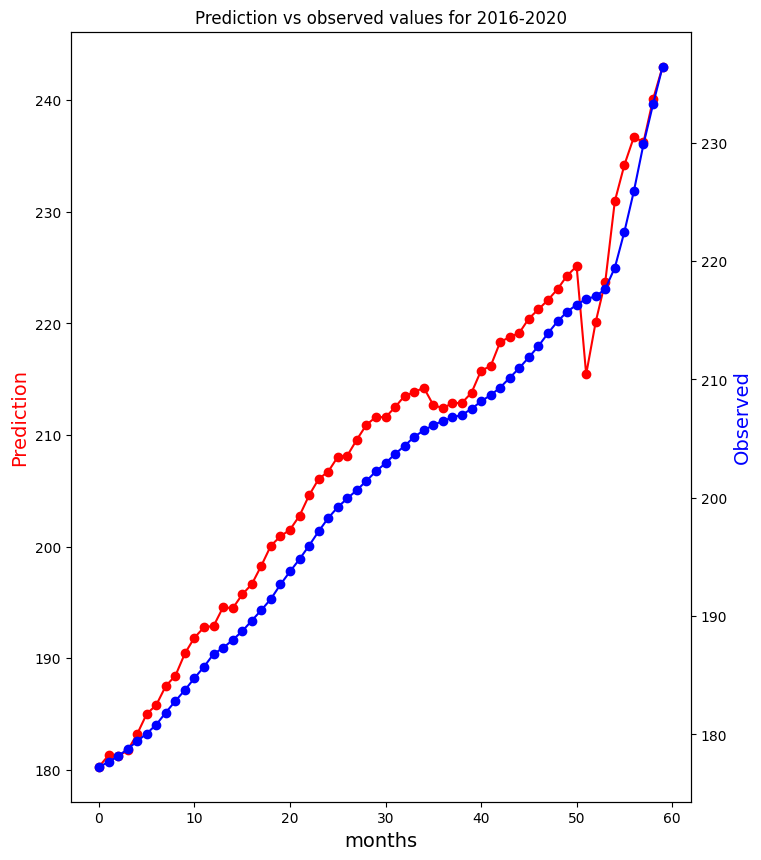

In [15]:
fig,ax = plt.subplots()
# make a plot
ax.plot(range(60), reg.predict(testx), color="red", marker="o")
# set x-axis label
ax.set_xlabel("months",fontsize=14)
# set y-axis label
ax.set_ylabel("Prediction",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(range(60),testy,color="blue",marker="o")
ax2.set_ylabel("Observed",color="blue",fontsize=14)
plt.title(label = "Prediction vs observed values for 2016-2020")
plt.show()